##Data Visualization

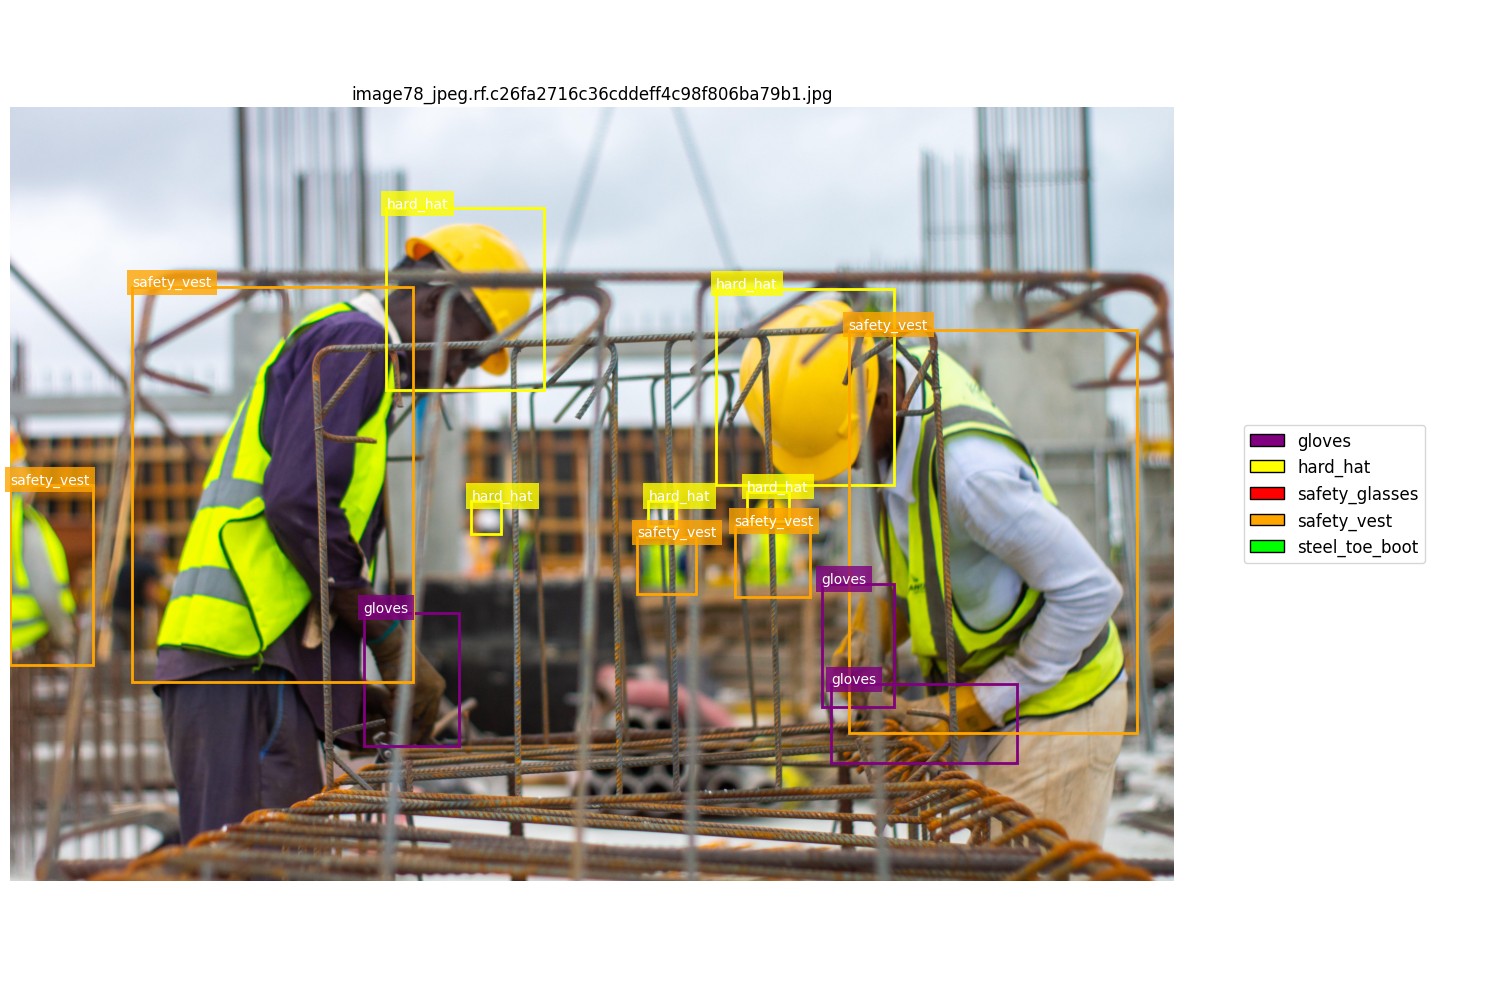

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

IMAGE_DIR = "/content/drive/MyDrive/MarshandaGwi_DE_Challenge/Challenge3/images"
LABEL_DIR = "/content/drive/MyDrive/MarshandaGwi_DE_Challenge/Challenge3/labels"

CLASS_NAMES = ["gloves", "hard_hat", "safety_glasses", "safety_vest", "steel_toe_boot"] # urutan label nya (harus berurutan)
CLASS_COLORS = {
    0: (128/255, 0, 128/255),       # gloves = ungu
    1: (1, 1, 0),                    # hard_hat = kuning (RGB)
    2: (1, 0, 0),                    # safety_glasses = merah
    3: (1, 165/255, 0),              # safety_vest = oranye
    4: (0, 1, 0),                    # steel_toe_boot = hijau
}

def read_yolo_labels(label_path, img_width, img_height):
    boxes = []
    if os.path.exists(label_path):
        with open(label_path, "r") as file:
            lines = file.readlines()
            for line in lines:
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:])
                x1 = int((x_center - width / 2) * img_width)
                y1 = int((y_center - height / 2) * img_height)
                x2 = int((x_center + width / 2) * img_width)
                y2 = int((y_center + height / 2) * img_height)
                boxes.append((class_id, x1, y1, x2, y2))
    return boxes

def visualize_image_with_boxes(image_name):
    image_path = os.path.join(IMAGE_DIR, image_name)
    label_path = os.path.join(LABEL_DIR, image_name.replace('.jpg', '.txt').replace('.png', '.txt'))

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    fig, (ax_img, ax_legend) = plt.subplots(1, 2, figsize=(15, 10),
                                gridspec_kw={'width_ratios': [4, 1]})

    boxes = read_yolo_labels(label_path, w, h)
    for class_id, x1, y1, x2, y2 in boxes:
        color = CLASS_COLORS.get(class_id, (1, 1, 1))
        label = CLASS_NAMES[class_id]

        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                            fill=False, edgecolor=color, linewidth=2)
        ax_img.add_patch(rect)

        ax_img.text(x1, y1 - 5, label, color='white', fontsize=10,
                   bbox=dict(facecolor=color, alpha=0.8, edgecolor='none'))


    ax_img.imshow(image)
    ax_img.axis('off')
    ax_img.set_title(image_name)

    legend_elements = [Patch(facecolor=CLASS_COLORS[i],
                            edgecolor='black',
                            label=CLASS_NAMES[i]) for i in range(len(CLASS_NAMES))]

    ax_legend.legend(handles=legend_elements, loc='center', fontsize=12)
    ax_legend.axis('off')

    plt.tight_layout()
    plt.show()

# Contoh pemanggilan (bisa diganti dengan nama file gambar yang ada dalam folder dataset/images)
visualize_image_with_boxes("image78_jpeg.rf.c26fa2716c36cddeff4c98f806ba79b1.jpg")

##Summary Statistik Label

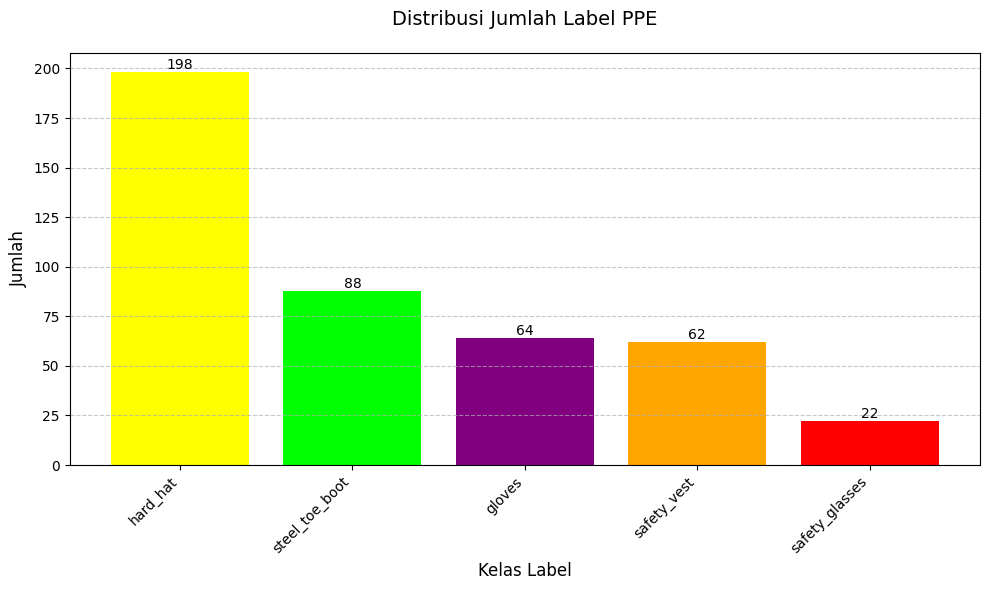

In [2]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

label_count = defaultdict(int)

for file in os.listdir(LABEL_DIR):
    if file.endswith(".txt"):
        with open(os.path.join(LABEL_DIR, file), "r") as f:
            lines = f.readlines()
            for line in lines:
                class_id = int(line.strip().split()[0])
                label_count[CLASS_NAMES[class_id]] += 1

sorted_labels = sorted(label_count.items(), key=lambda x: x[1], reverse=True)
labels, counts = zip(*sorted_labels)

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=[
    CLASS_COLORS[CLASS_NAMES.index(label)] for label in labels
])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.title('Distribusi Jumlah Label PPE', fontsize=14, pad=20)
plt.xlabel('Kelas Label', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()